In [6]:
"""
The assignment progresses with the following steps. In the Python file, the spaces after the "### ###" description lines are expected to be filled.
1- We will upload the image containing your own hand (as el_tespiti_1.jpg) using the open cv library.
2- We will convert it to our gray scale format.
3- We will make the height of our image 960 and its width 640.
4- Apply a 10*10 filter to our image.
5- Convert our image to BGR format and save it in the data folder as el_tespiti_odev.jpg.
6- Read our image through the mediapipe library
7- Perform the hand detection process on our image
8- Convert our image to BGR format and save it in the data folder as "el_tespiti_odev.jpg".
"""

'\nÖDEV Açıklama:\n\nÖdev aşağıdaki adımlarla ilerlemektedir. Python dosyasında "###  ###" açıklama satırlarından \nsonra gelen yerlerin doldurulması beklenilmektedir.\n\n1- Kendi Elinizi içeren resmi (el_tespiti_1.jpg olarak) open cv kütüphanesini kullanarak yükleyeceğiz.\n2- Gri ton (gray scale) formatımıza çevireceğiz. \n3- Resmimizin yüksekliğini 960 ve genişliğini 640 yapacağız.\n4- Resmimize 10*10 filtre uygulayınız.\n5- Resmimizi BGR formatına çevirip, el_tespit_odev.jpg olarak data klasörü içerisine kaydedin. \n6- Resmimizi mediapipe kütüphanesi üzerinden okuyun \n7- Resmimiz üzerinde el tespiti işlemini gerçekleştirin \n8- Resmimizi BGR formatına çevirip, data klasörü altında "el_tespit_odev.jpg" olarak kaydedin.\n'

In [7]:
### Libraries ###
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt


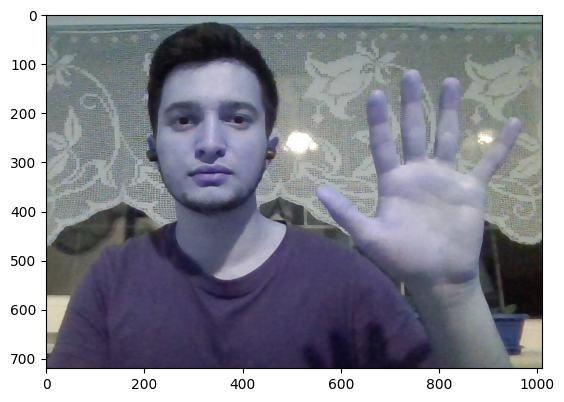

In [8]:
# The picture containing your hand (el_tespiti_1.jpg) is uploaded with Open CV.
image = cv2.imread("data/el_tespiti_1.jpg")
plt.imshow(image)

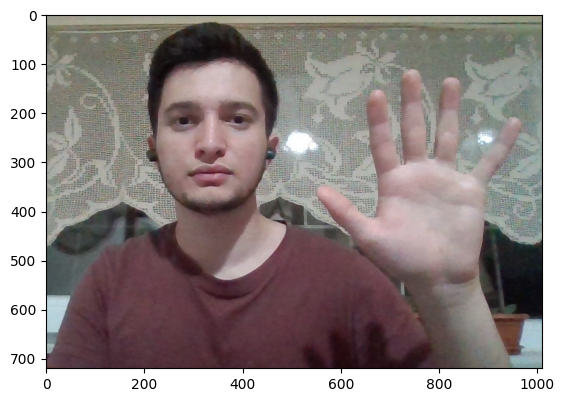

In [9]:
### convert the image to RGB format. ###
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

(960, 640, 3)


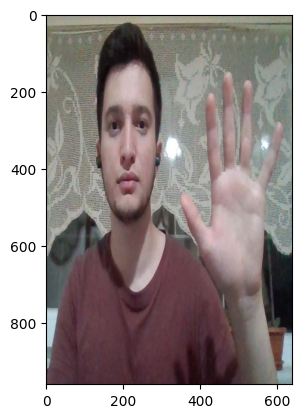

In [10]:
### Edit the image height as 960 and width as 640. ###
image = cv2.resize(image, (640,960))
print(image.shape)
plt.imshow(image)

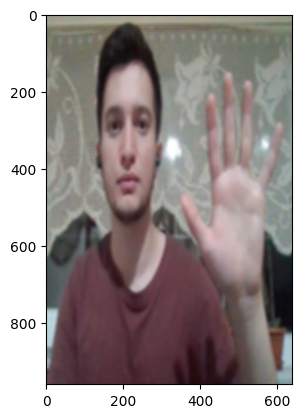

In [11]:
### Add 10*10 blur to the image. ###
image = cv2.blur(image,(10,10))
plt.imshow(image)

In [12]:
### Save the image as "el_tespit_odev.jpg" under the data folder. ###
cv2.imwrite('data/el_tespit_odev.jpg',image)

True

In [42]:
# The el_tespit_odev.jpg image is read via the mediapipe library. 
image = mp.Image.create_from_file("data\el_tespit_odev.jpg")

In [43]:
MARGIN=10 #distance from top corner of text to border of hand
FONT_SIZE = 3 #font size
FONT_THICKNESS = 2 #font thickness
HANDEDNESS_TEXT_COLOR = (255,0,0) #  red color

In [44]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [53]:
image = mp.Image.create_from_file("data\el_tespiti_1.jpg")
detection_result = detector.detect(image)

In [61]:
### Create detect (vectorized version of hand detected) image ###
detection_result

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9513016939163208, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.7983390092849731, y=0.7497227191925049, z=2.6467316160960763e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7146837711334229, y=0.7080400586128235, z=-0.03202814236283302, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6457120180130005, y=0.631403923034668, z=-0.05135419964790344, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6023389101028442, y=0.5573053359985352, z=-0.06983953714370728, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5631115436553955, y=0.5053750276565552, z=-0.08822274953126907, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.703549861907959, y=0.4721880257129669, z=-0.02358401007950306, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6835612654685974, y=0.3687456250190735, z=-0.04418671876192093, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.67515528

In [58]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [63]:
def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

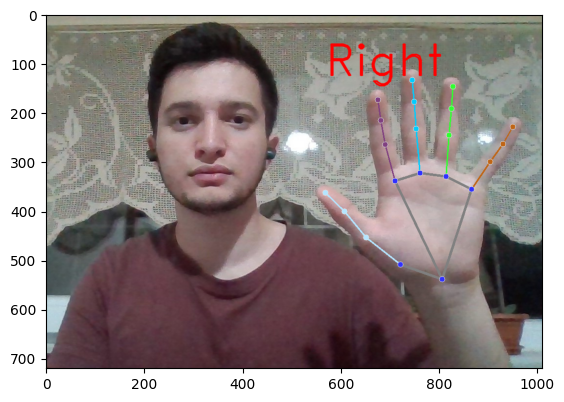

In [66]:
### Calculate the hand-detected visual version of the image ###
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)

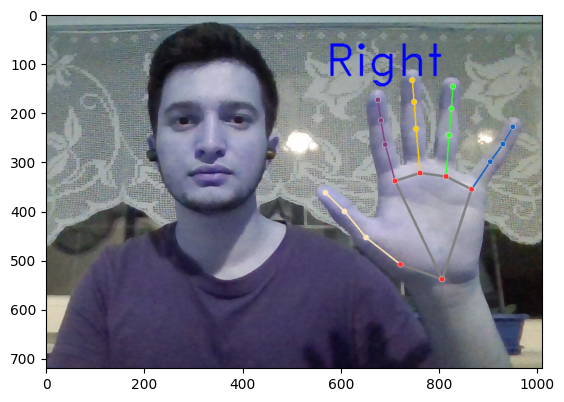

In [67]:
### Convert the hand-detected image to BGR format ###
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
plt.imshow(annotated_image)

In [68]:
# The image is saved as "el_tespit_odev.jpg" in the data folder. 
cv2.imwrite("data/el_tespit_odev.jpg",annotated_image)

True